In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
results_df = pd.read_csv("../outputs/BetaRegression_MeanRegression/results/test_predictions_SavingBestPearsonR.csv")
results_df

,Peptide,HLA,Qualitative Measurement,Peptide length,Number of Subjects Tested,Number of Subjects Positive,Alpha,Beta,Allele Pseudo-sequence,Allele Protein sequence,Target,Sample,Peptide Length,Distr. Mean,Distr. Variance,Distr. Mode,Distr. Precision,Stratification_index,Prediction Distr. Mean,Prediction Distr. Precision
0,QILKGGSGT,HLA-A02:01,Positive,9,15.0,12.0,13.0,4.0,YFAMYGEKVAHTHVDTLYVRYHYYTWAVLAYTWY,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,1,QILKGGSGT_HLA-A02:01,9,0.764706,0.009996,0.800000,17.0,HLA-A02:01_1,0.080882,11.139398
1,AITEVECFL,HLA-A02:01,Positive,9,13.0,6.0,7.0,8.0,YFAMYGEKVAHTHVDTLYVRYHYYTWAVLAYTWY,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,1,AITEVECFL_HLA-A02:01,9,0.466667,0.015556,0.461538,15.0,HLA-A02:01_1,0.580371,10.835062
2,LYNKYSFKL,HLA-A24:02,Negative,9,5.0,0.0,1.0,6.0,YSAMYEEKVAHTDENIAYLMFHYYTWAVQAYTGY,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFSTSVSRPGRGEPRF...,0,LYNKYSFKL_HLA-A24:02,9,0.142857,0.015306,0.000000,7.0,HLA-A24:02_0,0.088064,11.074095
3,ALDGNLVSMDV,HLA-A02:01,Positive,11,34.0,1.0,2.0,34.0,YFAMYGEKVAHTHVDTLYVRYHYYTWAVLAYTWY,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,1,ALDGNLVSMDV_HLA-A02:01,11,0.055556,0.001418,0.029412,36.0,HLA-A02:01_1,0.191032,31.765368
4,EDLLMGTLGIV,HLA-A02:01,Positive,11,8.0,2.0,3.0,7.0,YFAMYGEKVAHTHVDTLYVRYHYYTWAVLAYTWY,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,1,EDLLMGTLGIV_HLA-A02:01,11,0.300000,0.019091,0.250000,10.0,HLA-A02:01_1,0.210606,19.122175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4182,IPFLGIRET,HLA-B07:02,Negative,9,52.0,0.0,1.0,53.0,YYSEYRNIYAQTDESNLYLSYDYYTWAERAYEWY,MLVMAPRTVLLLLSAALALTETWAGSHSMRYFYTSVSRPGRGEPRF...,0,IPFLGIRET_HLA-B07:02,9,0.018519,0.000330,0.000000,54.0,HLA-B07:02_0,0.097966,9.873003
4183,SMNATLVQA,HLA-A02:01,Positive,9,14.0,2.0,3.0,13.0,YFAMYGEKVAHTHVDTLYVRYHYYTWAVLAYTWY,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,1,SMNATLVQA_HLA-A02:01,9,0.187500,0.008961,0.142857,16.0,HLA-A02:01_1,0.119097,16.244989
4184,AYRRRWRRL,HLA-A24:02,Positive,9,4.0,2.0,3.0,3.0,YSAMYEEKVAHTDENIAYLMFHYYTWAVQAYTGY,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFSTSVSRPGRGEPRF...,1,AYRRRWRRL_HLA-A24:02,9,0.500000,0.035714,0.500000,6.0,HLA-A24:02_1,0.174572,5.655990
4185,NWKNFYPSY,HLA-A24:07,Negative,9,1.0,0.0,1.0,2.0,YSAMYEEKVAQTDENIAYLMFHYYTWAVQAYTGY,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFSTSVSRPGRGEPRF...,0,NWKNFYPSY_HLA-A24:07,9,0.333333,0.055556,0.000000,3.0,HLA-A24:07_0,0.284538,3.337332


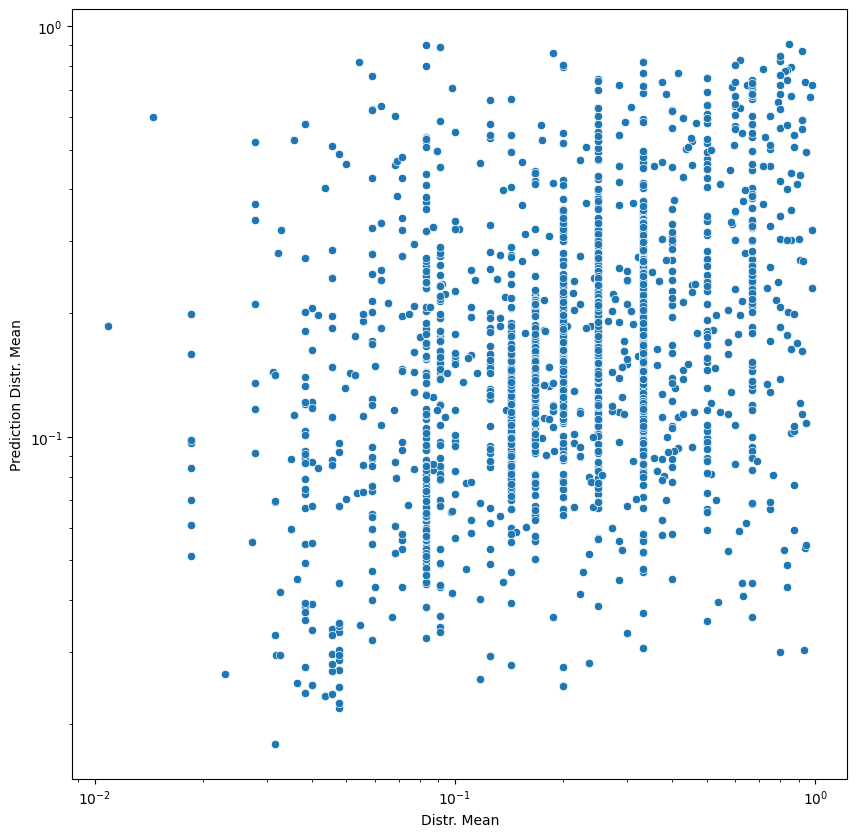

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(results_df, x="Distr. Mean", y="Prediction Distr. Mean", ax=ax)
ax.set_xscale("log")
ax.set_yscale("log")
plt.show()

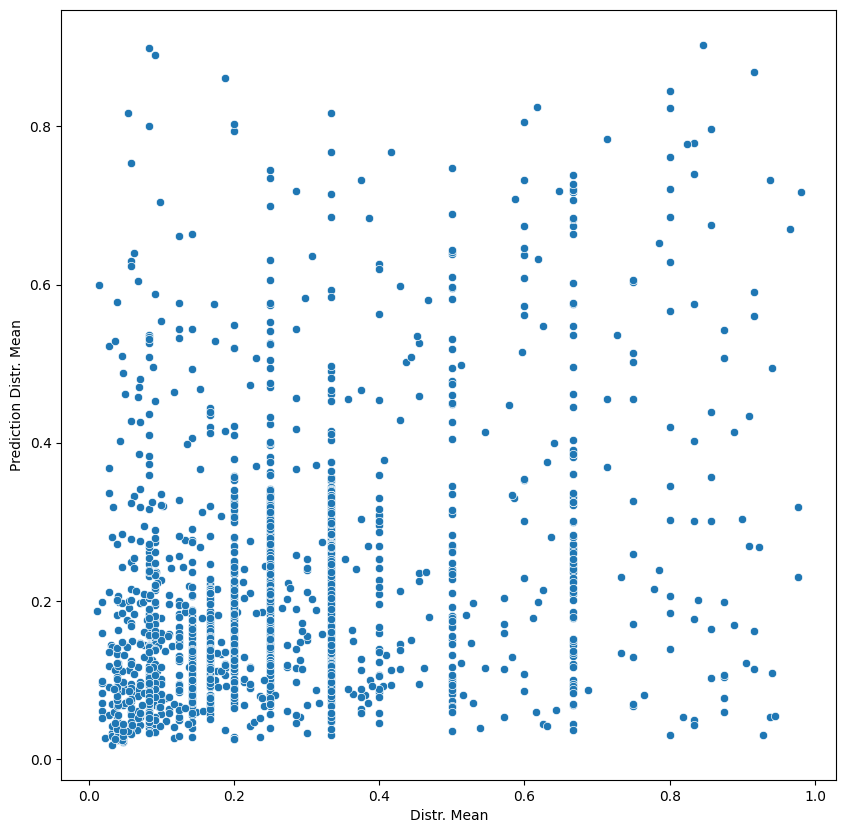

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(results_df, x="Distr. Mean", y="Prediction Distr. Mean", ax=ax)
plt.show()

In [12]:
from selfpeptide.utils.beta_distr_utils import beta_distr_params_from_mean_precision

In [15]:
alpha, beta, variance, mode = beta_distr_params_from_mean_precision(results_df["Prediction Distr. Mean"], results_df["Prediction Distr. Precision"])

In [16]:
variance

0       0.006124
1       0.020578
2       0.006651
3       0.004717
4       0.008262
          ...   
4182    0.008127
4183    0.006084
4184    0.021649
4185    0.046936
4186    0.033395
Length: 4187, dtype: float64

In [18]:
results_df["Mean Residuals"] = results_df["Distr. Mean"] - results_df["Prediction Distr. Mean"]

results_df["Norm. Mean Residuals"] = results_df["Mean Residuals"] / np.sqrt(variance)
results_df

,Peptide,HLA,Qualitative Measurement,Peptide length,Number of Subjects Tested,Number of Subjects Positive,Alpha,Beta,Allele Pseudo-sequence,Allele Protein sequence,...,Peptide Length,Distr. Mean,Distr. Variance,Distr. Mode,Distr. Precision,Stratification_index,Prediction Distr. Mean,Prediction Distr. Precision,Mean Residuals,Norm. Mean Residuals
0,QILKGGSGT,HLA-A02:01,Positive,9,15.0,12.0,13.0,4.0,YFAMYGEKVAHTHVDTLYVRYHYYTWAVLAYTWY,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,...,9,0.764706,0.009996,0.800000,17.0,HLA-A02:01_1,0.080882,11.139398,0.683824,8.738399
1,AITEVECFL,HLA-A02:01,Positive,9,13.0,6.0,7.0,8.0,YFAMYGEKVAHTHVDTLYVRYHYYTWAVLAYTWY,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,...,9,0.466667,0.015556,0.461538,15.0,HLA-A02:01_1,0.580371,10.835062,-0.113705,-0.792645
2,LYNKYSFKL,HLA-A24:02,Negative,9,5.0,0.0,1.0,6.0,YSAMYEEKVAHTDENIAYLMFHYYTWAVQAYTGY,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFSTSVSRPGRGEPRF...,...,9,0.142857,0.015306,0.000000,7.0,HLA-A24:02_0,0.088064,11.074095,0.054793,0.671842
3,ALDGNLVSMDV,HLA-A02:01,Positive,11,34.0,1.0,2.0,34.0,YFAMYGEKVAHTHVDTLYVRYHYYTWAVLAYTWY,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,...,11,0.055556,0.001418,0.029412,36.0,HLA-A02:01_1,0.191032,31.765368,-0.135476,-1.972657
4,EDLLMGTLGIV,HLA-A02:01,Positive,11,8.0,2.0,3.0,7.0,YFAMYGEKVAHTHVDTLYVRYHYYTWAVLAYTWY,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,...,11,0.300000,0.019091,0.250000,10.0,HLA-A02:01_1,0.210606,19.122175,0.089394,0.983481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4182,IPFLGIRET,HLA-B07:02,Negative,9,52.0,0.0,1.0,53.0,YYSEYRNIYAQTDESNLYLSYDYYTWAERAYEWY,MLVMAPRTVLLLLSAALALTETWAGSHSMRYFYTSVSRPGRGEPRF...,...,9,0.018519,0.000330,0.000000,54.0,HLA-B07:02_0,0.097966,9.873003,-0.079447,-0.881262
4183,SMNATLVQA,HLA-A02:01,Positive,9,14.0,2.0,3.0,13.0,YFAMYGEKVAHTHVDTLYVRYHYYTWAVLAYTWY,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,...,9,0.187500,0.008961,0.142857,16.0,HLA-A02:01_1,0.119097,16.244989,0.068403,0.876986
4184,AYRRRWRRL,HLA-A24:02,Positive,9,4.0,2.0,3.0,3.0,YSAMYEEKVAHTDENIAYLMFHYYTWAVQAYTGY,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFSTSVSRPGRGEPRF...,...,9,0.500000,0.035714,0.500000,6.0,HLA-A24:02_1,0.174572,5.655990,0.325428,2.211743
4185,NWKNFYPSY,HLA-A24:07,Negative,9,1.0,0.0,1.0,2.0,YSAMYEEKVAQTDENIAYLMFHYYTWAVQAYTGY,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFSTSVSRPGRGEPRF...,...,9,0.333333,0.055556,0.000000,3.0,HLA-A24:07_0,0.284538,3.337332,0.048795,0.225231


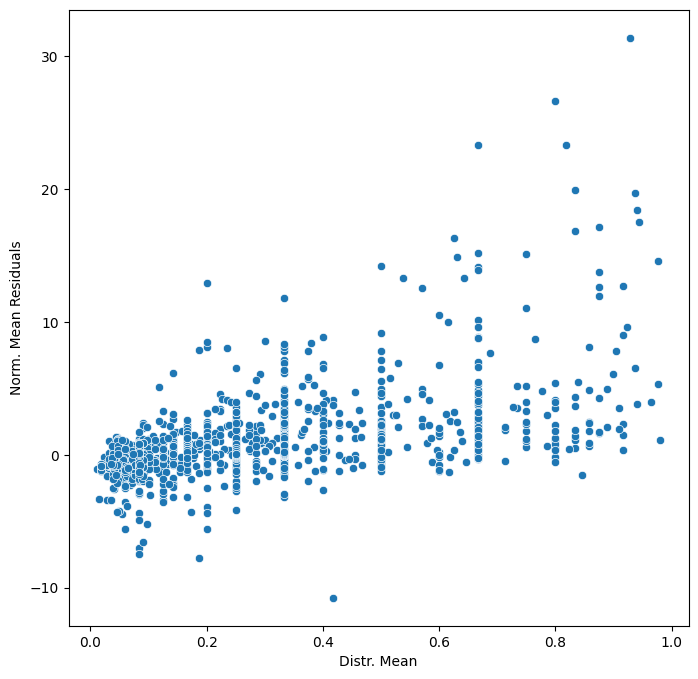

In [24]:
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(results_df, x="Distr. Mean", y="Norm. Mean Residuals", ax=ax)
# ax.set_yscale("log")
plt.show()

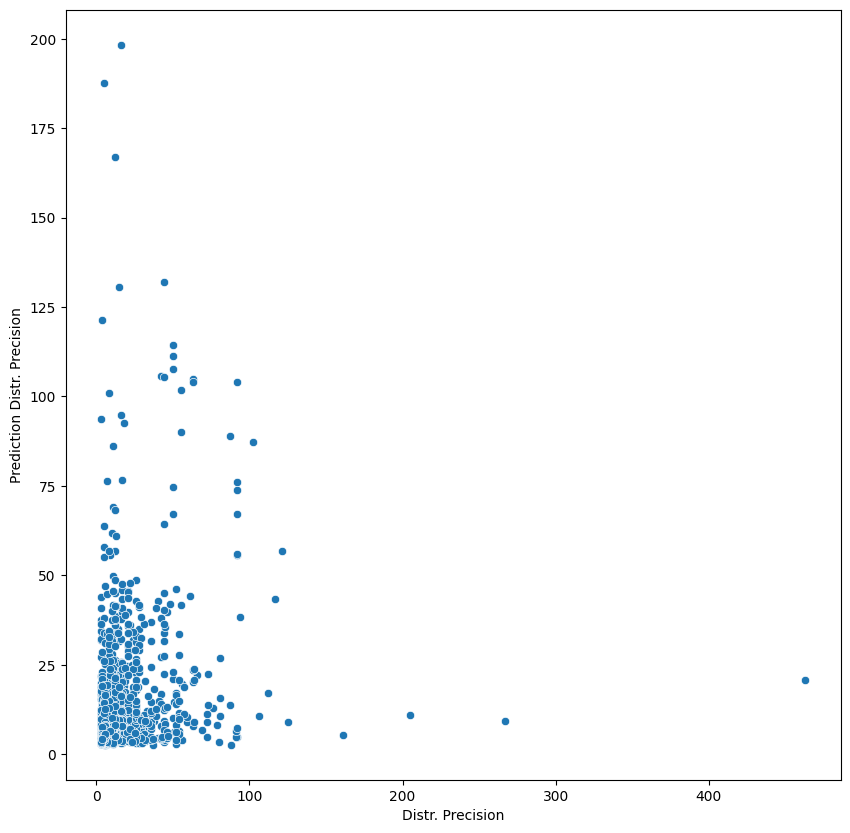

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(results_df, x="Distr. Precision", y="Prediction Distr. Precision", ax=ax)
# ax.set_xscale("log")
# ax.set_yscale("log")
plt.show()